In [ ]:
import torch
from torch import nn
from jlib.classifier import Classifier
from jlib.get_shakespeare_loaders import *

models = []
datas = []
text = ""
with open('data/sequence.txt', 'r') as f:
    text = f.read()

class ShakespeareRNN(Classifier):
    def __init__(self, alphabet_size, hidden_size, rnn=nn.RNN, linear_network=[], learning_rate = 1e-2, sequence_length = 20, dropout=0.3):
        super().__init__()
        self.learning_rate = learning_rate
        self.sequence_length = sequence_length
        self.hidden_size = hidden_size
        self.embedding = nn.Embedding(alphabet_size, hidden_size)
        self.rnn = rnn(hidden_size, hidden_size, batch_first=True)
        self.fc = nn.Sequential()
        linear_in = hidden_size
        linear_out = alphabet_size
        for i, layer_size in enumerate(linear_network):
            self.fc.add_module(f'linear_{i}', nn.Linear(linear_in, layer_size))
            self.fc.add_module(f'batchnorm_{i}', nn.BatchNorm1d(layer_size))
            self.fc.add_module(f'relu_{i}', nn.ReLU())
            self.fc.add_module(f'dropout_{i}', nn.Dropout(dropout))
            linear_in = layer_size
        self.fc.add_module('final_linear', nn.Linear(linear_in, linear_out))
        
    def forward(self, x):
        x = self.embedding(x)
        x, _ = self.rnn(x)
        x = self.fc(x[:, -1, :])  # Get the output of the last RNN cell
        return x

def train_and_plot(train, val, model: ShakespeareRNN, name, *training_args, **training_kwargs):
    print(f"Training {name}")
    param_count = sum(p.numel() for p in model.parameters())
    print(f"Model has {param_count} parameters")
    model.train_model(
        *training_args,
        **training_kwargs,
        train_loader=train,
        val_loader=val,
    )
    fig = model.plot_training(f"{name} Training")
    fig.savefig(f"images/{name}_training_new.png")
    print(f"Model has {param_count} parameters")
    model.train_model(*training_args, **training_kwargs)
    fig = model.plot_training(f"{name} Training")
    fig.savefig(f"images/{name}_training_new.png")



# LSTM 20

|         17         |     12.059863      |      1.506090      |      1.522133      |      1.065223      |     54.237812      |      0.428305      |    5.365932e-08    |      8.688843      |
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|         18         |     11.342974      |      1.497544      |      1.514246      |      1.115282      |     54.447159      |      0.385979      |    4.752802e-08    |      8.688843      |
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|         19         |     12.041207      |      1.488781      |      1.508447      |      1.320974      |     54.562815      |      0.212419      |    6.733981e-08    |      8.688843      |
---------------------------------------------

/home/jaskin/Intro_Deep_Learning/HM3/jlib/classifier.py:237: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.last_pred = torch.tensor(Y_pred_eval)


Model has 148801 parameters


TypeError: Classifier.train_model() missing 2 required positional arguments: 'train_loader' and 'val_loader'

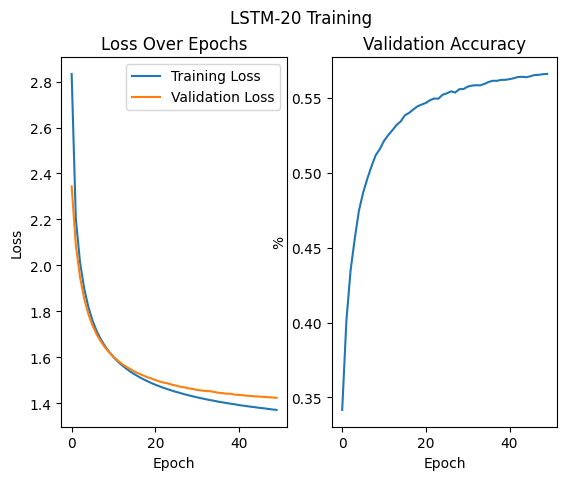

In [3]:
data_20 = get_shakespeare_loaders(
    train_batch_size=2**13,
    val_batch_size=2**15,
    sequence_length=20,
)
datas.append(data_20)

for model in models:
    del model

lstm20 = ShakespeareRNN(
    alphabet_size=len(data_20['chars']),
    hidden_size=128,
    rnn=nn.LSTM,
).to('cuda')
models.append(lstm20)
train_and_plot(
    data_20['train_loader'],
    data_20['val_loader'],
    lstm20,
    "LSTM-20",
    epochs=50,
    optimizer = torch.optim.Adam,
    optimizer_kwargs = {'lr': 0.001},
    min_accuracy = 0.99,
    max_negative_diff_count = 7   
)

# LSTM-Adjusted-20

In [ ]:
for model in models:
    del model

lstm_adj_20 = ShakespeareRNN(
    alphabet_size=len(data_20['chars']),
    hidden_size=100,
    rnn=nn.LSTM,
    linear_network=[128,64],
    dropout=0.3
).to('cuda')
models.append(lstm_adj_20)
train_and_plot(
    data_20['train_loader'],
    data_20['val_loader'],
    lstm_adj_20,
    "LSTM-20",
    epochs=50,
    optimizer = torch.optim.Adam,
    optimizer_kwargs = {'lr': 0.001},
    min_accuracy = 0.99,
    max_negative_diff_count = 7   
)

Training LSTM-20
Model has 113093 parameters
Training ShakespeareRNN

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


/home/jaskin/Intro_Deep_Learning/HM3/jlib/classifier.py:108: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.last_val = torch.tensor(val_loader.data_iterable.dataset.dataset.targets)


# GRU-20

In [ ]:
for model in models:
    del model

gru_20 = ShakespeareRNN(
    alphabet_size=len(data_20['chars']),
    hidden_size=128,
    rnn=nn.GRU,
).to('cuda')
models.append(gru_20)
train_and_plot(
    data_20['train_loader'],
    data_20['val_loader'],
    gru_20,
    "GRU-20",
    epochs=50,
    optimizer = torch.optim.Adam,
    optimizer_kwargs = {'lr': 0.001},
    min_accuracy = 0.99,
    max_negative_diff_count = 7   
)

# GRU-Adjusted-20

In [ ]:
for model in models:
    del model

gru_adj_20 = ShakespeareRNN(
    alphabet_size=len(data_20['chars']),
    hidden_size=100,
    rnn=nn.GRU,
    linear_network=[128,64],
    dropout=0.3
).to('cuda')
models.append(gru_adj_20)
train_and_plot(
    data_20['train_loader'],
    data_20['val_loader'],
    gru_adj_20,
    "GRU-20",
    epochs=50,
    optimizer = torch.optim.Adam,
    optimizer_kwargs = {'lr': 0.001},
    min_accuracy = 0.99,
    max_negative_diff_count = 7   
)

# LSTM-30

In [ ]:
for data in datas:
    del data

data_30 = get_shakespeare_loaders(
    train_batch_size=2**13,
    val_batch_size=2**15,
    sequence_length=20,
)
datas.append(data_30)

for model in models:
    del model


lstm30 = ShakespeareRNN(
    alphabet_size=len(data_30['chars']),
    hidden_size=128,
    rnn=nn.LSTM,
).to('cuda')
models.append(lstm30)
train_and_plot(
    data_30['train_loader'],
    data_30['val_loader'],
    lstm30,
    "LSTM-20",
    epochs=50,
    optimizer = torch.optim.Adam,
    optimizer_kwargs = {'lr': 0.001},
    min_accuracy = 0.99,
    max_negative_diff_count = 7   
)

# LSTM-Adjusted-30

In [ ]:
for model in models:
    del model
lstmadj_30 = ShakespeareRNN(
    alphabet_size=len(data_30['chars']),
    hidden_size=100,
    rnn=nn.LSTM,
    linear_network=[128,64],
    dropout=0.3
).to('cuda')
models.append(lstmadj_30)
train_and_plot(
    data_30['train_loader'],
    data_30['val_loader'],
    lstmadj_30,
    "LSTM-20",
    epochs=50,
    optimizer = torch.optim.Adam,
    optimizer_kwargs = {'lr': 0.001},
    min_accuracy = 0.99,
    max_negative_diff_count = 7   
)

# GRU-30

In [ ]:
gru_30 = ShakespeareRNN(
    alphabet_size=len(data_30['chars']),
    hidden_size=128,
    rnn=nn.GRU,
).to('cuda')
models.append(gru_30)
train_and_plot(
    data_30['train_loader'],
    data_30['val_loader'],
    gru_30,
    "GRU-20",
    epochs=50,
    optimizer = torch.optim.Adam,
    optimizer_kwargs = {'lr': 0.001},
    min_accuracy = 0.99,
    max_negative_diff_count = 7   
)

# GRU-Adjusted-30

In [ ]:
for model in models:
    del model
gru_adj_30 = ShakespeareRNN(
    alphabet_size=len(data_30['chars']),
    hidden_size=100,
    rnn=nn.GRU,
    linear_network=[128,64],
    dropout=0.3
)
models.append(gru_adj_30)
train_and_plot(
    data_30['train_loader'],
    data_30['val_loader'],
    gru_adj_30,
    "GRU-20",
    epochs=50,
    optimizer = torch.optim.Adam,
    optimizer_kwargs = {'lr': 0.001},
    min_accuracy = 0.99,
    max_negative_diff_count = 7   
)

# LSTM-50

In [ ]:
for data in datas:
    del data

data_50 = get_shakespeare_loaders(
    train_batch_size=2**13,
    val_batch_size=2**15,
    sequence_length=20,
)
datas.append(data_50)

In [ ]:
for model in models:
    del model
    
lstm50 = ShakespeareRNN(
    alphabet_size=len(data_50['chars']),
    hidden_size=128,
    rnn=nn.LSTM,
).to('cuda')
models.append(lstm50)
train_and_plot(
    data_50['train_loader'],
    data_50['val_loader'],
    lstm50,
    "LSTM-20",
    epochs=50,
    optimizer = torch.optim.Adam,
    optimizer_kwargs = {'lr': 0.001},
    min_accuracy = 0.99,
    max_negative_diff_count = 7   
)

# LSTM-Adjusted-50

In [ ]:
lstmadj_50 = ShakespeareRNN(
    alphabet_size=len(data_50['chars']),
    hidden_size=100,
    rnn=nn.LSTM,
    linear_network=[128,64],
    dropout=0.3
).to('cuda')
models.append(lstmadj_50)

train_and_plot(
    data_50['train_loader'],
    data_50['val_loader'],
    lstmadj_50,
    "LSTM-20",
    epochs=50,
    optimizer = torch.optim.Adam,
    optimizer_kwargs = {'lr': 0.001},
    min_accuracy = 0.99,
    max_negative_diff_count = 7   
)


# GRU-50

In [ ]:
for model in models:
    del model
gru_50 = ShakespeareRNN(
    alphabet_size=len(data_50['chars']),
    hidden_size=128,
    rnn=nn.GRU,
).to('cuda')

models.append(gru_50)

train_and_plot(
    data_50['train_loader'],
    data_50['val_loader'],
    gru_50,
    "GRU-20",
    epochs=50,
    optimizer = torch.optim.Adam,
    optimizer_kwargs = {'lr': 0.001},
    min_accuracy = 0.99,
    max_negative_diff_count = 7   
)

# GRU-Adjusted-50

In [ ]:
gru_adj_50 = ShakespeareRNN(
    alphabet_size=len(data_50['chars']),
    hidden_size=100,
    rnn=nn.GRU,
    linear_network=[128,64],
    dropout=0.3
).to('cuda')
models.append(gru_adj_50)
train_and_plot(
    data_50['train_loader'],
    data_50['val_loader'],
    gru_adj_50,
    "GRU-20",
    epochs=50,
    optimizer = torch.optim.Adam,
    optimizer_kwargs = {'lr': 0.001},
    min_accuracy = 0.99,
    max_negative_diff_count = 7   
)